<a href="https://colab.research.google.com/github/marcondesc/mcws_wasa/blob/main/Coocorr%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Baixar stopwords se ainda não estiverem disponíveis
nltk.download('stopwords')
nltk.download('punkt')

# Definir as stop words (opcional)
#stop_words = set(stopwords.words('portuguese'))
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# Carregar arquivo csv
df = pd.read_csv('/content/scopus_1_418_docs.csv')

In [3]:
df

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Gökalp E., Şener U., Eren P.E.",56403164300;57191337618;6603471003;,Development of an assessment model for industr...,2017,Communications in Computer and Information Sci...,770,NaN,NaN,128,142,...,9783319673820,NaN,NaN,English,Commun. Comput. Info. Sci.,Conference Paper,Final,NaN,Scopus,2-s2.0-85029749405
1,"Ranganathan C., Teo T.S.H., Dhaliwal J.",56279244100;35613161000;36840589700;,Web-enabled supply chain management: Key antec...,2011,International Journal of Information Management,31,6,NaN,533,545,...,NaN,IJMAE,NaN,English,Int J Inf Manage,Article,Final,NaN,Scopus,2-s2.0-80054758732
2,"Gregory R.W., Kaganer E., Henfridsson O., Ruch...",7402331878;22950643100;7801578626;55037817200;,It consumerization and the transformation of i...,2018,MIS Quarterly: Management Information Systems,42,4,NaN,1225,1253,...,NaN,MISQD,NaN,English,MIS Quart Manage Inf Syst,Article,Final,NaN,Scopus,2-s2.0-85055977330
3,Roy J.,7202869405;,E-government in Canada: Transformation for the...,2006,E-Government in Canada: Transformation for the...,NaN,NaN,NaN,1,364,...,9780776606170,NaN,NaN,English,E-Government in Canada: Transformation for the...,Book,Final,NaN,Scopus,2-s2.0-84897294922
4,"Kohli R., Johnson S.",35516928800;55326975300;,Digital transformation in latecomer industries...,2011,MIS Quarterly Executive,10,4,NaN,141,156,...,NaN,NaN,NaN,English,MIS Q. Exec.,Article,Final,NaN,Scopus,2-s2.0-84864562150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,"Nekesa Akullo W., Adebisi Oyelude A.",57190953419;25650299600;,"Standing Conference of Eastern, Central, and S...",2016,International Information and Library Review,48,3,NaN,228,231,...,NaN,NaN,NaN,English,Int. Inf. Libr. Rev.,Article,Final,NaN,Scopus,2-s2.0-84984688818
448,[No author name available],[No author id available],"Lecture Notes in Informatics (LNI), Proceeding...",2015,"Lecture Notes in Informatics (LNI), Proceeding...",244,NaN,NaN,NaN,NaN,...,9783885796381,NaN,NaN,English; German,"Lect. Notes Informatics (LNI), Proc. - Series ...",Conference Review,Final,NaN,Scopus,2-s2.0-85018287150
449,Escadafal A.,57170761900;,From territories to tourist areas: Ending some...,2015,Sud-Ouest Europeen,2015-January,39,NaN,55,63,...,NaN,NaN,NaN,French,Sud-Ouest Europeen,Article,Final,"All Open Access, Hybrid Gold",Scopus,2-s2.0-84960906758
450,"Sardis E., Kokkinos P., Kardara M.",35749297000;24344257700;24923061600;,PERIKLIS - electronic democracy in the 21st ce...,2014,Communications in Computer and Information Sci...,441,NaN,NaN,202,212,...,9783319117096,NaN,NaN,English,Commun. Comput. Info. Sci.,Article,Final,NaN,Scopus,2-s2.0-85016386361


In [4]:
# Funções

# Função para processar os textos e extrair palavras-chave
def process_texts(texts, stop_words=None):
    # Converter o set de stop words para lista
    stop_words = list(stop_words) if stop_words else None

    # Tokenização e remoção de stop words
    vectorizer = CountVectorizer(stop_words=stop_words)
    X = vectorizer.fit_transform(texts)
    terms = vectorizer.get_feature_names_out()

    # Coocorrências de palavras
    cooc_matrix = (X.T * X)  # Matriz de coocorrência
    cooc_matrix.setdiag(0)   # Zerando a diagonal (não consideramos a coocorrência de uma palavra com ela mesma)

    return terms, cooc_matrix

# Função para construir e desenhar a rede de coocorrência
def plot_cooccurrence_network(terms, cooc_matrix, threshold=0):
    G = nx.Graph()

    # Adicionando arestas com base na matriz de coocorrência
    num_terms = len(terms)
    for i in range(num_terms):
        for j in range(i + 1, num_terms):
            if cooc_matrix[i, j] > threshold:  # Adiciona se a coocorrência for maior que o limiar
                G.add_edge(terms[i], terms[j], weight=cooc_matrix[i, j])

    # Desenhando o gráfico
    pos = nx.spring_layout(G, k=0.15, iterations=20)  # Layout da rede
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=[d['weight'] * 0.1 for (u, v, d) in G.edges(data=True)])
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    plt.title("Rede de Coocorrência de Palavras-chave")
    plt.show()


In [5]:
# Processar os textos e obter termos e matriz de coocorrência
terms, cooc_matrix = process_texts(df['Title'], stop_words=stop_words)

In [6]:
terms

array(['11', '11th', '12th', ..., '工业数据驱动技术在大型复杂天然气管网运行中的应用', '挑战与对策研究',
       '烟草企业数据资产管理方法研究及实践'], dtype=object)

In [7]:
cooc_matrix

<1397x1397 sparse matrix of type '<class 'numpy.int64'>'
	with 30203 stored elements in Compressed Sparse Column format>

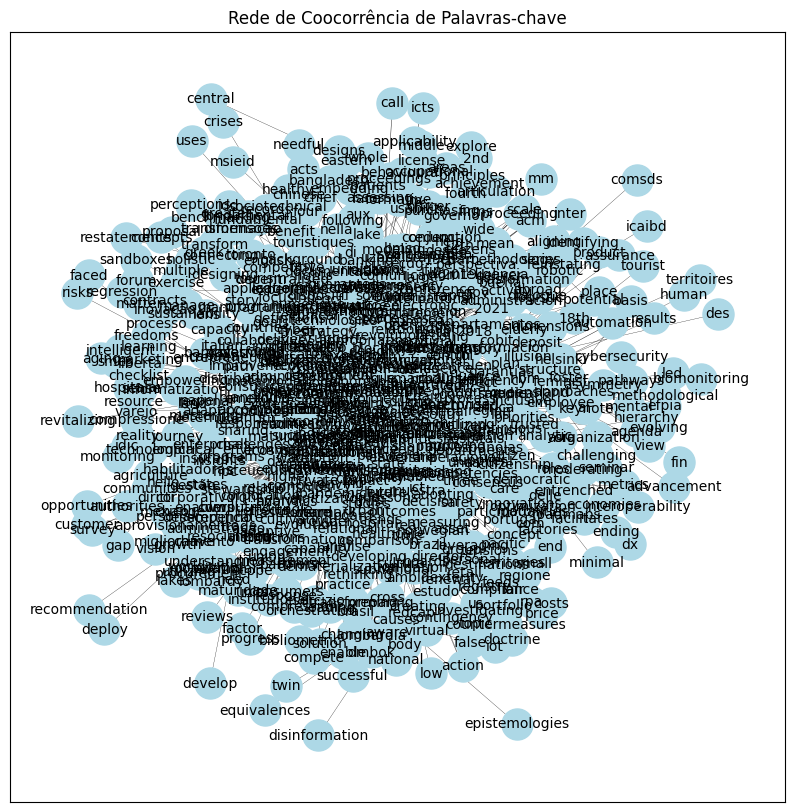

In [8]:
# Gerar a rede de coocorrência com um limiar de 1 (ou seja, palavras que coocorrem pelo menos uma vez)
plot_cooccurrence_network(terms, cooc_matrix.toarray(), threshold=1)

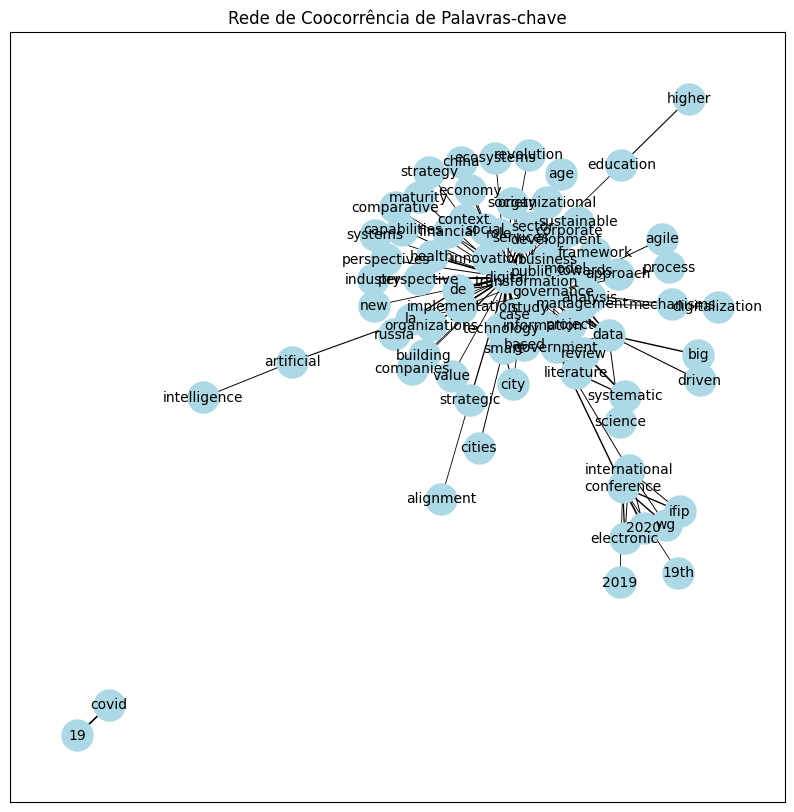

In [9]:
plot_cooccurrence_network(terms, cooc_matrix.toarray(), threshold=5)

Nuvem de Palavras

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# Função para gerar uma nuvem de palavras
def generate_word_cloud(texts, stop_words=None):
    # Unir todos os textos em um só
    combined_text = " ".join(texts)

    # Gerar a nuvem de palavras
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(combined_text)

    # Exibir a nuvem de palavras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


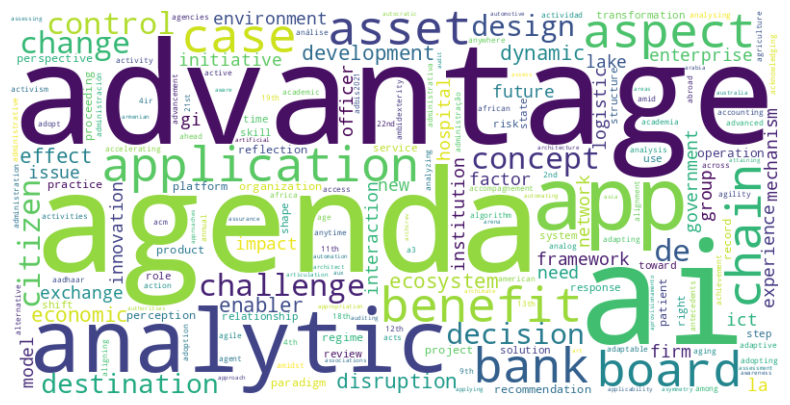

In [12]:
# Gerar a nuvem de palavras
generate_word_cloud(terms, stop_words=stop_words)

# Mapa de Calor
Ainda não deu muito certo

In [13]:
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
# Função para gerar um mapa de calor de frequências de tokens
def generate_heatmap(texts, stop_words=None):
    # Tokenização e contagem de palavras
    vectorizer = CountVectorizer(stop_words=stop_words)
    X = vectorizer.fit_transform(texts)

    # Obter os tokens (palavras)
    terms = vectorizer.get_feature_names_out()

    # Obter a contagem de cada token
    token_counts = X.toarray().sum(axis=0)

    # Criar um DataFrame com as contagens
    df = pd.DataFrame({'token': terms, 'count': token_counts})

    # Ordenar os tokens por frequência
    df = df.sort_values(by='count', ascending=False)

    # Criar o mapa de calor
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.set_index('token').T, annot=True, cmap='Blues', cbar=False)

    plt.title("Mapa de Calor das Frequências dos Tokens")
    plt.show()


In [15]:
# Gerar o mapa de calor
generate_heatmap(terms, stop_words=stop_words)

InvalidParameterError: The 'stop_words' parameter of CountVectorizer must be a str among {'english'}, an instance of 'list' or None. Got {'against', 'from', 'the', "didn't", 'there', "aren't", 'mightn', 'to', 'ain', 'was', 'is', 'such', 'once', 'did', "isn't", 'yourself', 'me', 'yourselves', 's', "mustn't", 'through', 'i', 'by', 'here', 'm', 'which', 'what', 'at', 'been', 'whom', 'll', 've', "you've", 'any', 'weren', 'with', 'theirs', 'when', "she's", 'shouldn', 'ours', 'or', 'while', 'we', 'their', 'just', 'herself', 'them', 'now', "shan't", 'has', 'himself', 'off', 'should', "needn't", 'shan', 'd', 'more', 'o', 'are', 'how', 'further', 'hers', 'own', 'below', 'y', 'where', 'hadn', 'about', "that'll", 'will', 'nor', 'being', 'were', 'hasn', "doesn't", 'again', 'same', "couldn't", 'then', 'why', 'he', 'his', 'no', 'so', 'him', "wouldn't", 'during', 'itself', 'very', 'than', 'ma', 'if', 'on', 'under', "shouldn't", 'each', 'as', "it's", 'its', 'couldn', 'of', 'after', 'it', "mightn't", "you're", "wasn't", 're', 'doing', 'above', 'had', 'not', 'down', "haven't", "hadn't", 'am', 'in', 'needn', 'don', 'myself', 'wasn', 'mustn', 'our', 'this', 'into', 't', 'they', "should've", 'her', 'between', 'be', 'most', 'for', 'isn', 'wouldn', "you'll", "don't", 'only', "you'd", 'out', 'who', 'these', 'themselves', 'have', 'my', 'up', 'all', 'you', 'ourselves', 'and', 'that', 'too', "won't", "hasn't", 'until', 'both', 'before', 'but', 'won', 'a', 'some', 'doesn', "weren't", 'didn', 'do', 'haven', 'she', 'an', 'those', 'yours', 'over', 'aren', 'few', 'can', 'your', 'because', 'having', 'other', 'does'} instead.

In [16]:
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Função para gerar o bubble chart dos termos
def generate_bubble_chart(texts, stop_words=None):
    # Tokenização e contagem de palavras
    vectorizer = CountVectorizer(stop_words=stop_words)
    X = vectorizer.fit_transform(texts)

    # Obter os tokens (palavras)
    terms = vectorizer.get_feature_names_out()

    # Obter a contagem de cada token
    token_counts = X.toarray().sum(axis=0)

    # Criar um DataFrame com as contagens
    df = pd.DataFrame({'token': terms, 'count': token_counts})

    # Gerar o bubble chart usando plotly
    fig = px.scatter(df, x='token', y='count', size='count', hover_name='token',
                     title="Bubble Chart de Termos", size_max=60)

    # Exibir o gráfico
    fig.show()

# Exemplo de textos (as mesmas frases utilizadas anteriormente)
texts = [
    "O tratamento de crianças com TEA envolve terapia e acompanhamento profissional.",
    "A musicoterapia ajuda no desenvolvimento social e cognitivo de crianças com TEA.",
    "Tecnologias de comunicação facilitam a interação em sessões de musicoterapia.",
    "Crianças com TEA podem melhorar suas habilidades sociais através de terapias especializadas."
]

# Definir as stop words (opcional)
#stop_words = ['de', 'e', 'a', 'o', 'com', 'em', 'as', 'através', 'suas', 'que']  # lista customizada de stopwords

# Gerar o bubble chart
#generate_bubble_chart(texts, stop_words=stop_words)


In [17]:
# Gerar o bubble chart
generate_bubble_chart(terms, stop_words=stop_words)

InvalidParameterError: The 'stop_words' parameter of CountVectorizer must be a str among {'english'}, an instance of 'list' or None. Got {'against', 'from', 'the', "didn't", 'there', "aren't", 'mightn', 'to', 'ain', 'was', 'is', 'such', 'once', 'did', "isn't", 'yourself', 'me', 'yourselves', 's', "mustn't", 'through', 'i', 'by', 'here', 'm', 'which', 'what', 'at', 'been', 'whom', 'll', 've', "you've", 'any', 'weren', 'with', 'theirs', 'when', "she's", 'shouldn', 'ours', 'or', 'while', 'we', 'their', 'just', 'herself', 'them', 'now', "shan't", 'has', 'himself', 'off', 'should', "needn't", 'shan', 'd', 'more', 'o', 'are', 'how', 'further', 'hers', 'own', 'below', 'y', 'where', 'hadn', 'about', "that'll", 'will', 'nor', 'being', 'were', 'hasn', "doesn't", 'again', 'same', "couldn't", 'then', 'why', 'he', 'his', 'no', 'so', 'him', "wouldn't", 'during', 'itself', 'very', 'than', 'ma', 'if', 'on', 'under', "shouldn't", 'each', 'as', "it's", 'its', 'couldn', 'of', 'after', 'it', "mightn't", "you're", "wasn't", 're', 'doing', 'above', 'had', 'not', 'down', "haven't", "hadn't", 'am', 'in', 'needn', 'don', 'myself', 'wasn', 'mustn', 'our', 'this', 'into', 't', 'they', "should've", 'her', 'between', 'be', 'most', 'for', 'isn', 'wouldn', "you'll", "don't", 'only', "you'd", 'out', 'who', 'these', 'themselves', 'have', 'my', 'up', 'all', 'you', 'ourselves', 'and', 'that', 'too', "won't", "hasn't", 'until', 'both', 'before', 'but', 'won', 'a', 'some', 'doesn', "weren't", 'didn', 'do', 'haven', 'she', 'an', 'those', 'yours', 'over', 'aren', 'few', 'can', 'your', 'because', 'having', 'other', 'does'} instead.

In [18]:
cooc_matrix[0][0]

<1x1397 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Column format>

In [19]:
# prompt: exibir os primeiros elementos da matriz cooc_matrix

print(cooc_matrix.toarray()[:15, :15])

[[0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 2 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 2 0 0 0 0 0 0 2 0]
 [1 0 2 0 0 0 3 0 0 0 0 0 2 0 0]
 [0 1 0 1 1 0 0 0 0 0 0 0 0 0 0]]


In [20]:
# prompt: exibir os primeiros elementos de terms

print(terms[:100])

['11' '11th' '12th' '13th' '18th' '19' '19th' '2002' '2003' '2016' '2017'
 '2018' '2019' '2020' '2021' '2030' '21st' '22nd' '2nd' '360' '4ir' '4th'
 '9th' 'a3' 'aadhaar' 'abroad' 'academia' 'academic' 'accelerating'
 'access' 'accompagnement' 'accounting' 'achievement' 'acknowledging'
 'acm' 'across' 'action' 'active' 'actividad' 'activism' 'activities'
 'activity' 'acts' 'adaptable' 'adapting' 'adaptive' 'adbis2021'
 'administración' 'administration' 'administrativa' 'administrative'
 'administração' 'adopt' 'adopting' 'adoption' 'advanced' 'advancement'
 'advantage' 'advantages' 'africa' 'african' 'age' 'agencies' 'agenda'
 'agendas' 'agent' 'agile' 'agility' 'aging' 'agriculture' 'ahead' 'ai'
 'ais' 'algorithm' 'aligning' 'alignment' 'alternative' 'ambidexterity'
 'american' 'amid' 'amidst' 'among' 'analog' 'analysing' 'analysis'
 'analytic' 'analytics' 'analyzing' 'annual' 'antecedents' 'anytime'
 'anywhere' 'análise' 'app' 'applicability' 'application' 'applications'
 'applying' '

# Dendograma

melhorar a entrada do texto: precisa adaptar de Dataframe para texto, ou fazer a função aceitar a coluna do Dataframe

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
# Função para gerar o dendrograma
def gerar_dendrograma(texto):
    # Tokenize o texto em sentenças
    sentencas = nltk.sent_tokenize(texto)

    # Vetorização TF-IDF das sentenças
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(sentencas).toarray()

    # Realiza o linkage
    Z = linkage(X, method='ward')

    # Cria o dendrograma
    plt.figure(figsize=(10, 5))
    dendrogram(Z, labels=sentencas, leaf_rotation=90)
    plt.title('Dendrograma de Sentenças')
    plt.xlabel('Sentenças')
    plt.ylabel('Distância')
    plt.show()

In [23]:
# Função para gerar o dendrograma de palavras
def gerar_dendrograma_palavras(texto):
    # Tokenize o texto em palavras (tokens)
    palavras = nltk.word_tokenize(texto)

    # Remover palavras de parada (stop words) e pontuação
    stopwords = nltk.corpus.stopwords.words('portuguese')
    palavras_filtradas = [palavra for palavra in palavras if palavra.isalnum() and palavra.lower() not in stopwords]

    # Vetorização TF-IDF das palavras
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(palavras_filtradas).toarray()

    # Realiza o linkage
    Z = linkage(X, method='ward')

    # Cria o dendrograma
    plt.figure(figsize=(10, 5))
    dendrogram(Z, labels=palavras_filtradas, leaf_rotation=90)
    plt.title('Dendrograma de Palavras')
    plt.xlabel('Palavras')
    plt.ylabel('Distância')
    plt.show()

In [29]:
# Gerar o dendrograma do texto
gerar_dendrograma(df['Title'])

TypeError: expected string or bytes-like object

In [30]:
# Gerar o dendrograma de palavras
gerar_dendrograma_palavras(df['Title'])

TypeError: expected string or bytes-like object